## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)


2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


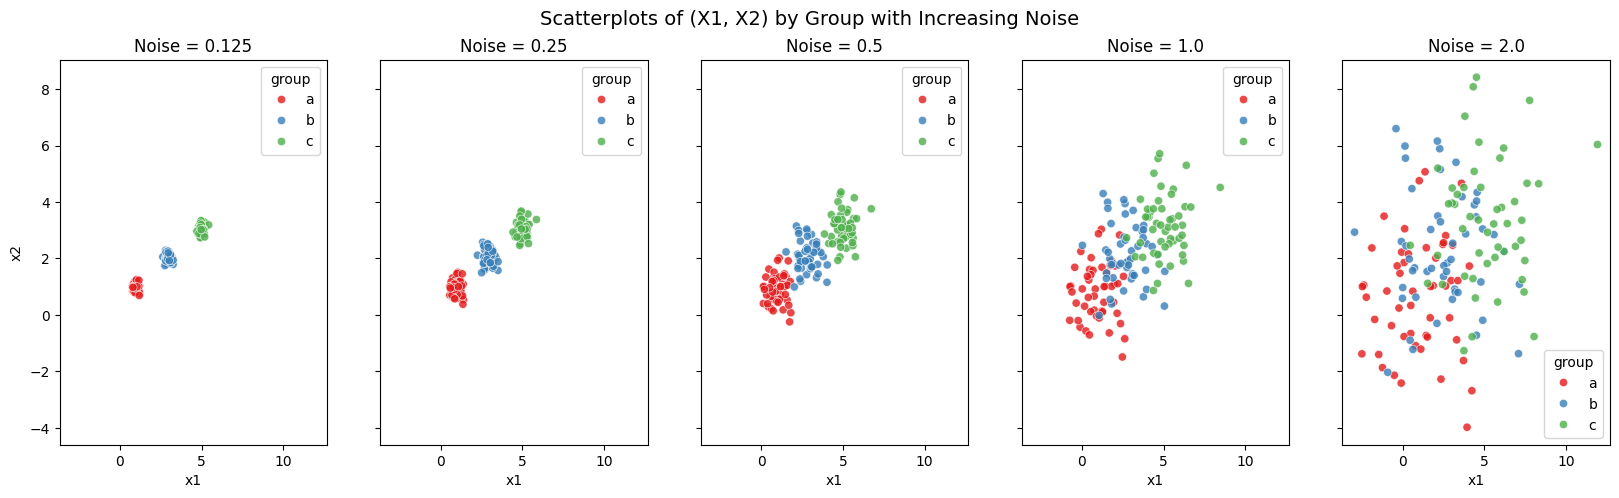

In [ ]:
datasets = [(df0_125, 0.125), (df0_25, 0.25), (df0_5, 0.5), (df1_0, 1.0), (df2_0, 2.0)]

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)

for ax, (df, noise) in zip(axes, datasets):
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', ax=ax, palette='Set1', alpha=0.8)
    ax.set_title(f"Noise = {noise}")

plt.suptitle("Scatterplots of (X1, X2) by Group with Increasing Noise", fontsize=14)
plt.show()

As the noise level increases from 0.125 to 2.0, the clusters become less visually distinct. At low noise levels (0.125 and 0.25), the three groups (a, b, c) are well-separated and compact, making them easy to distinguish. As the noise increases to 0.5 and 1.0, the clusters begin to spread out, with some overlap appearing between neighboring groups. At high noise levels (2.0), the points become highly dispersed, leading to significant overlap among the groups, making classification much harder.

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)


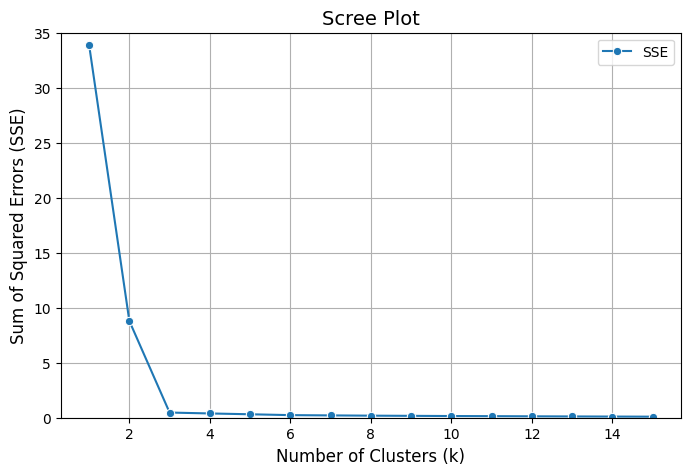

In [ ]:
from sklearn.cluster import KMeans

def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())

def scree(data, k_bar=15, y_limit=None):
    X = data[['x1', 'x2']].apply(maxmin)  
    
    k_grid = np.arange(1, k_bar + 1)  
    SSE = np.zeros(k_bar)  
    for k in range(k_bar):
        model = KMeans(n_clusters=k + 1, max_iter=300, n_init=10, random_state=0)  
        model = model.fit(X)  
        SSE[k] = model.inertia_  
    
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=k_grid, y=SSE, marker='o', label='SSE')
    plt.title('Scree Plot', fontsize=14)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Sum of Squared Errors (SSE)', fontsize=12)
    if y_limit:
        plt.ylim(0, y_limit)
    plt.grid(True)
    plt.show()

scree(df0_125, y_limit=35)

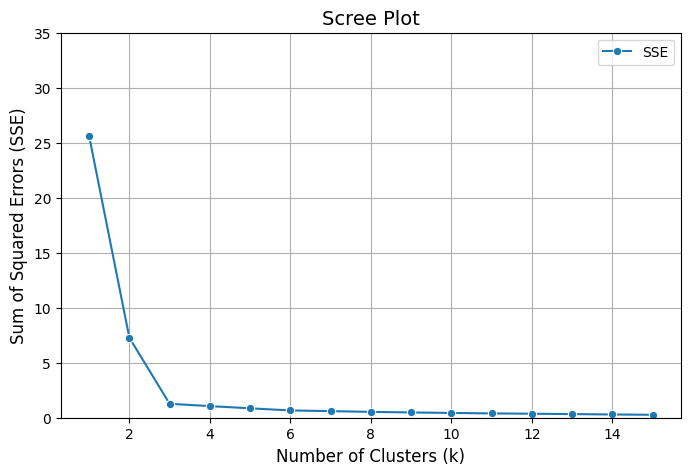

In [8]:
scree(df0_25, y_limit=35)

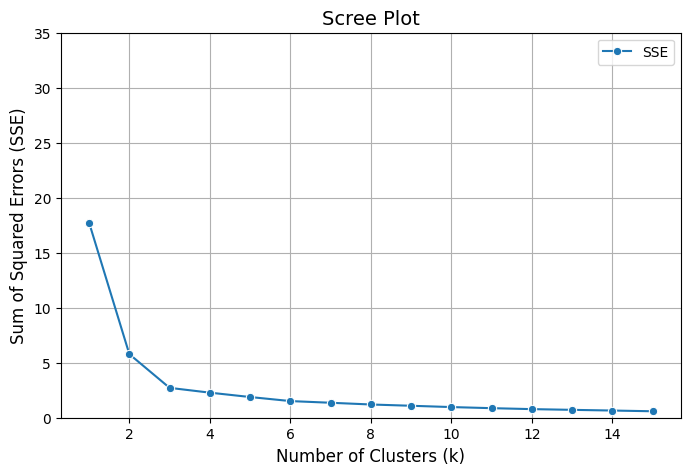

In [9]:
scree(df0_5, y_limit=35)

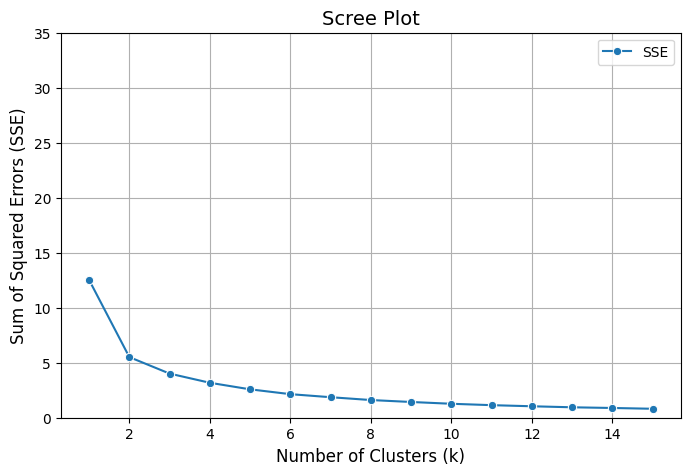

In [10]:
scree(df1_0, y_limit=35)

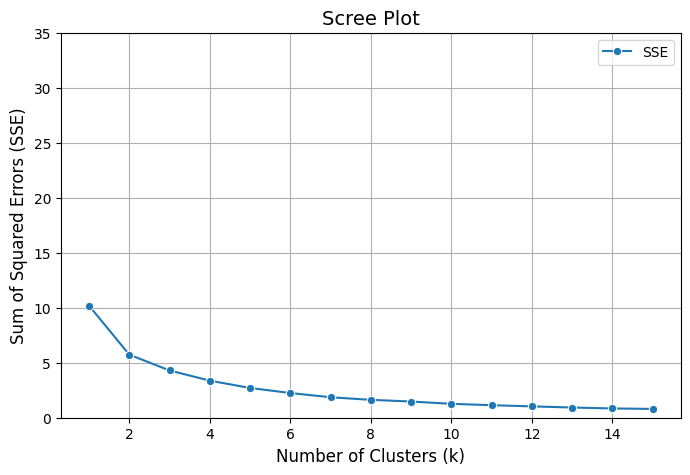

In [11]:
scree(df2_0, y_limit=35)

As the level of noise increases, the scree plot becomes more curved and it is difficult to discern a clear elbow in the plot.

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The "elbow" in a scree plot is a visual heuristic used to determine the optimal number of clusters (
𝑘
) in a dataset. It represents the point where adding more clusters results in diminishing returns in reducing the Sum of Squared Errors (SSE). As 
𝑘
 increases, the SSE continues to decrease, but at a slower rate. Eventually, a point is reached—the "elbow"—where further increasing 
𝑘
 results in only marginal reductions in SSE. This is the point of diminishing returns, suggesting that splitting the data into more clusters does not meaningfully improve the grouping.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?


In [20]:
file_path = "./data/2022 election cycle fundraising.csv"
df = pd.read_csv(file_path)
df.head()

,index,Member,Party,State,Chamber,Raised,Spent,Cash on Hand,Debts
0,0,Abigail Spanberger,Democratic,Virginia,House,"$7,719,396","$7,449,678","$851,851",$0
1,1,Adam Kinzinger,Republican,Illinois,House,"$2,192,741","$1,243,502","$2,472,888",$0
2,2,Adam Schiff,Democratic,California,House,"$20,993,041","$13,957,854","$20,942,888",$0
3,3,Adam Smith,Democratic,Washington,House,"$1,211,111","$1,173,466","$623,472",$0
4,4,Adrian Smith,Republican,Nebraska,House,"$1,617,611","$1,664,674","$1,098,579",$0


In [21]:
for col in ['Raised', 'Spent', 'Cash on Hand', 'Debts']:   # Removed '$' and ',' and convert to numeric
    df[col] = df[col].str.replace('[\$,]', '', regex=True).astype(float)


In [ ]:
print(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].dtypes)
print(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']].describe())

Raised          float64
Spent           float64
Cash on Hand    float64
Debts           float64
dtype: object
             Raised         Spent  Cash on Hand         Debts
count  5.370000e+02  5.370000e+02  5.370000e+02  5.370000e+02
mean   3.592287e+06  2.875221e+06  1.790359e+06  1.268609e+05
std    7.376927e+06  6.332135e+06  2.804002e+06  8.426411e+05
min   -1.386356e+06  0.000000e+00 -6.478100e+04  0.000000e+00
25%    9.632370e+05  7.325080e+05  4.148470e+05  0.000000e+00
50%    1.731244e+06  1.239741e+06  9.592380e+05  0.000000e+00
75%    3.360517e+06  2.505998e+06  1.924564e+06  0.000000e+00
max    8.658147e+07  7.595981e+07  2.276298e+07  1.330200e+07


In [15]:
df=df[['Raised', 'Spent', 'Cash on Hand', 'Debts']]
df.head()

,Raised,Spent,Cash on Hand,Debts
0,7719396.0,7449678.0,851851.0,0.0
1,2192741.0,1243502.0,2472888.0,0.0
2,20993041.0,13957854.0,20942888.0,0.0
3,1211111.0,1173466.0,623472.0,0.0
4,1617611.0,1664674.0,1098579.0,0.0


2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.


In [22]:
# Max-min normalize "Raised" and "Spent"
df['Raised'] = (df['Raised'] - df['Raised'].min()) / (df['Raised'].max() - df['Raised'].min())
df['Spent'] = (df['Spent'] - df['Spent'].min()) / (df['Spent'].max() - df['Spent'].min())

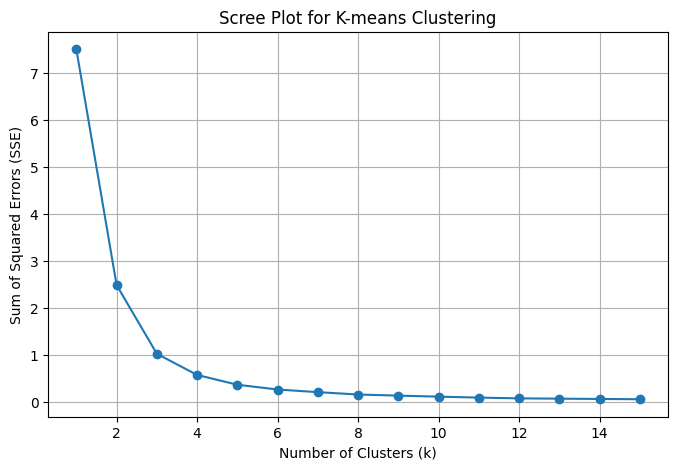

In [23]:
k_bar = 15
k_grid = np.arange(1, k_bar + 1)
SSE = []

for k in k_grid:
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(df[['Raised', 'Spent']])
    SSE.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_grid, SSE, marker='o')
plt.title('Scree Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

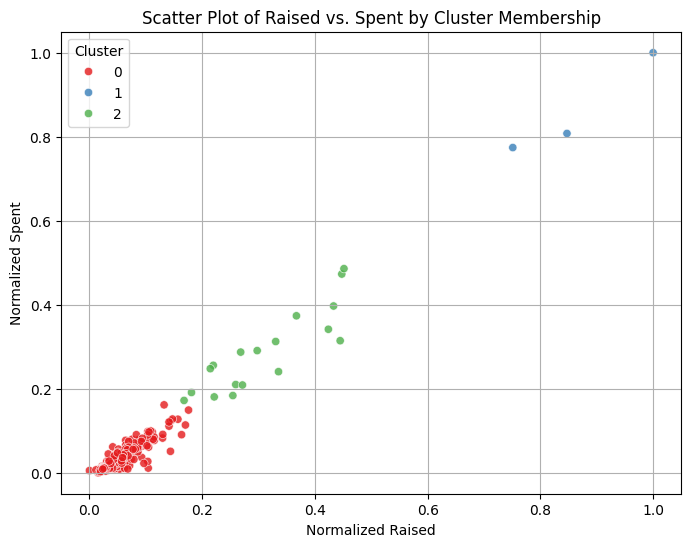

In [ ]:
optimal_k = 3  # from the scree plot
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Raised', 'Spent']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster', palette='Set1', alpha=0.8)
plt.title('Scatter Plot of Raised vs. Spent by Cluster Membership')
plt.xlabel('Normalized Raised')
plt.ylabel('Normalized Spent')
plt.grid(True)
plt.show()

In [ ]:
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

smallest_clusters = cluster_sizes.nsmallest(2).index
smallest_cluster_members = df[df['Cluster'].isin(smallest_clusters)]
print(smallest_cluster_members)

Cluster
0    516
2     18
1      3
Name: count, dtype: int64
     index                  Member       Party           State Chamber  \
2        2             Adam Schiff  Democratic      California   House   
87      87  Catherine Cortez Masto  Democratic          Nevada  Senate   
89      89           Chuck Schumer  Democratic        New York  Senate   
115    115            Dan Crenshaw  Republican           Texas   House   
261    261            John Kennedy  Republican       Louisiana  Senate   
290    290            Katie Porter  Democratic      California   House   
298    298          Kevin McCarthy  Republican      California   House   
326    326           Maggie Hassan  Democratic   New Hampshire  Senate   
328    328             Marco Rubio  Republican         Florida  Senate   
340    340              Mark Kelly  Democratic         Arizona  Senate   
357    357          Michael Bennet  Democratic        Colorado  Senate   
390    390            Nancy Pelosi  Democratic     

3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.


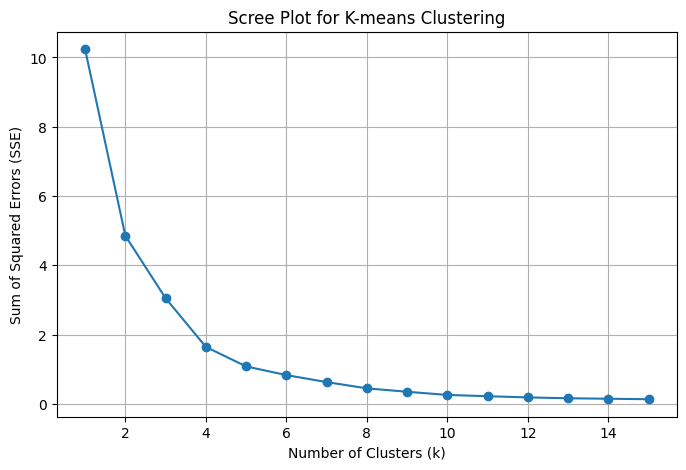

In [28]:
# Max-min normalize "Cash on Hand" and "Debts"
df['Cash on Hand'] = (df['Cash on Hand'] - df['Cash on Hand'].min()) / (df['Cash on Hand'].max() - df['Cash on Hand'].min())
df['Debts'] = (df['Debts'] - df['Debts'].min()) / (df['Debts'].max() - df['Debts'].min())

k_bar = 15
k_grid = np.arange(1, k_bar + 1)
SSE = []

for k in k_grid:
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(df[['Cash on Hand', 'Debts']])
    SSE.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_grid, SSE, marker='o')
plt.title('Scree Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

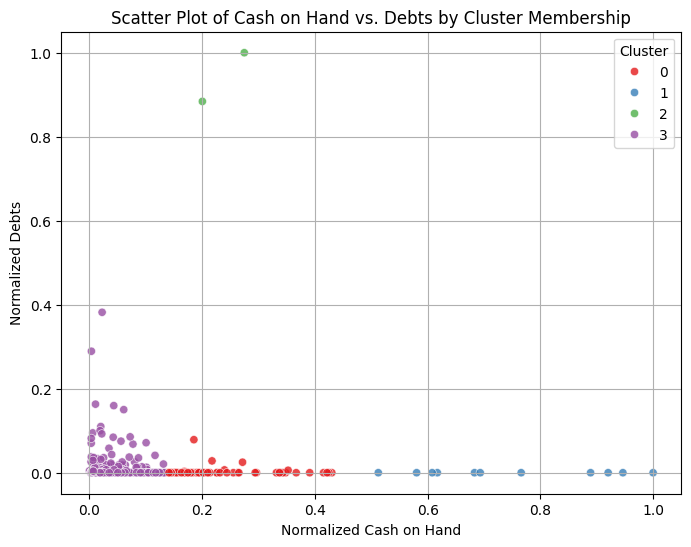

In [29]:
optimal_k = 4  # from the scree plot
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Cash on Hand', 'Debts']])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Cash on Hand', y='Debts', hue='Cluster', palette='Set1', alpha=0.8)
plt.title('Scatter Plot of Cash on Hand vs. Debts by Cluster Membership')
plt.xlabel('Normalized Cash on Hand')
plt.ylabel('Normalized Debts')
plt.grid(True)
plt.show()

In [30]:
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

smallest_clusters = cluster_sizes.nsmallest(2).index
smallest_cluster_members = df[df['Cluster'].isin(smallest_clusters)]
print(smallest_cluster_members)

Cluster
3    460
0     64
1     11
2      2
Name: count, dtype: int64
     index               Member       Party           State Chamber    Raised  \
2        2          Adam Schiff  Democratic      California   House  0.254404   
89      89        Chuck Schumer  Democratic        New York  Senate  0.423863   
133    133          David Trone  Democratic        Maryland   House  0.163436   
261    261         John Kennedy  Republican       Louisiana  Senate  0.335412   
267    267           John Thune  Republican    South Dakota  Senate  0.092727   
274    274      Josh Gottheimer  Democratic      New Jersey   House  0.103522   
290    290         Katie Porter  Democratic      California   House  0.259505   
310    310       Lindsey Graham  Republican  South Carolina  Senate  0.091874   
340    340           Mark Kelly  Democratic         Arizona  Senate  0.847210   
412    412  Raja Krishnamoorthi  Democratic        Illinois   House  0.104928   
417    417      Raphael Warnock  Democr

The clustering shifted focus to financial stability.

4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?


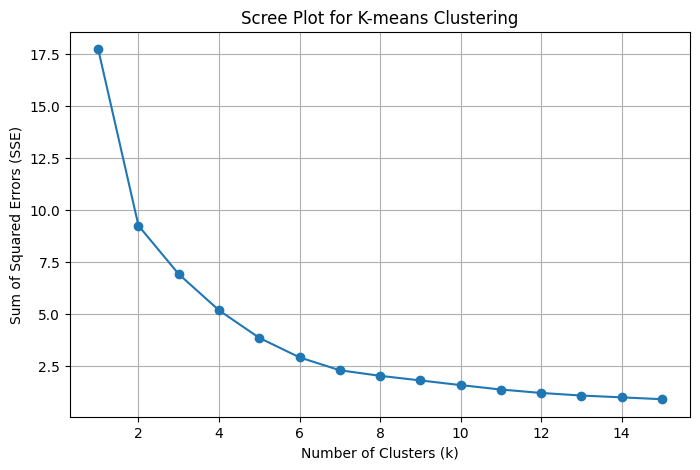

In [ ]:
k_bar = 15
k_grid = np.arange(1, k_bar + 1)
SSE = []

for k in k_grid:
    model = KMeans(n_clusters=k, max_iter=300, n_init=10, random_state=0)
    model.fit(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])
    SSE.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_grid, SSE, marker='o')
plt.title('Scree Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

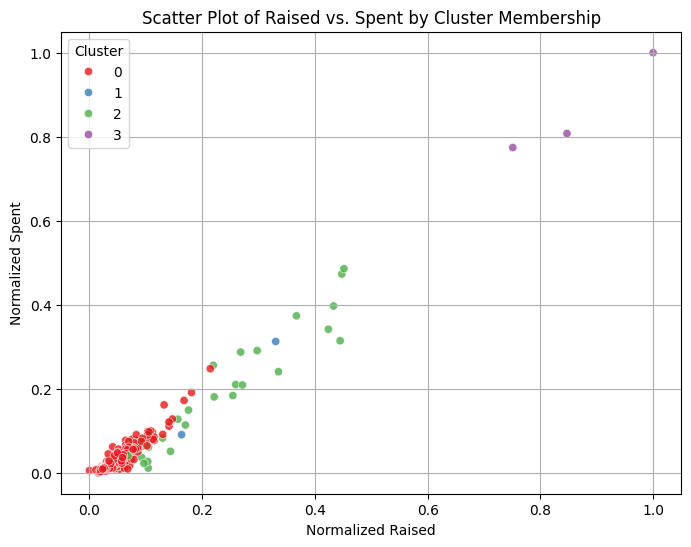

In [33]:
optimal_k = 4  # from the scree plot
kmeans = KMeans(n_clusters=optimal_k, max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df[['Raised', 'Spent', 'Cash on Hand', 'Debts']])


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Raised', y='Spent', hue='Cluster', palette='Set1', alpha=0.8)
plt.title('Scatter Plot of Raised vs. Spent by Cluster Membership')
plt.xlabel('Normalized Raised')
plt.ylabel('Normalized Spent')
plt.grid(True)
plt.show()

In [ ]:
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

smallest_clusters = cluster_sizes.nsmallest(2).index
smallest_cluster_members = df[df['Cluster'].isin(smallest_clusters)]
print(smallest_cluster_members)

Cluster
0    502
2     30
3      3
1      2
Name: count, dtype: int64
     index           Member       Party      State Chamber    Raised  \
133    133      David Trone  Democratic   Maryland   House  0.163436   
340    340       Mark Kelly  Democratic    Arizona  Senate  0.847210   
417    417  Raphael Warnock  Democratic    Georgia  Senate  1.000000   
442    442      Ron Johnson  Republican  Wisconsin  Senate  0.330431   
523    523      Val Demings  Democratic    Florida   House  0.751061   

        Spent  Cash on Hand     Debts  Cluster  
133  0.090549      0.274716  1.000000        1  
340  0.807760      0.580473  0.000000        3  
417  1.000000      1.000000  0.000000        3  
442  0.312424      0.200342  0.884067        1  
523  0.774181      0.294046  0.000000        3  


Some candidates, like Adam Schiff, Ron Johnson, and Raphael Warnock, appear consistently in small clusters across all analyses. This suggests they have unique financial profiles that stand out, regardless of the variables considered.

5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

The 
𝑘
-means clustering algorithm revealed several useful patterns in analyzing the election data. When clustering based on Raised and Spent, it highlighted candidates with distinct fundraising and spending behaviors, such as high-profile individuals like Raphael Warnock and Mark Kelly, who stood out due to their significant financial activity. 

Adding Cash on Hand and Debts in the second analysis offered a deeper understanding of financial stability. Candidates like David Trone, with high debts, and Ron Johnson, with moderate fundraising but substantial liabilities, emerged as unique cases. 

Finally, clustering with all four variables combined the strengths of both approaches, offering the most comprehensive view. It identified candidates with extreme financial profiles, such as Raphael Warnock, who excelled across all metrics, and David Trone, whose high debt made him an outlier.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts? 
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?